# Perkenalan

Nama/Batch : Sandika/008

# Import Pustaka

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
from sklearn import svm

# Data Loading

In [ ]:
df_dummy = pd.read_csv('weatherAUS.csv')

In [ ]:
df=df_dummy.copy()

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

terdapat 16 data numerik dan 7 data kategori

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df = df.drop(columns=['Date'],axis=1)

proses penghapusan kolom date

# EDA

Text(0.5, 1.0, 'Rainfall Histogram')

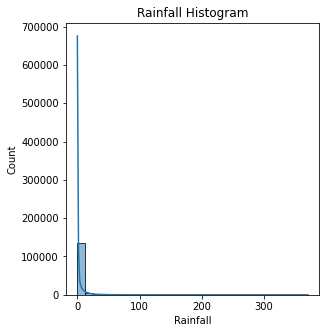

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Rainfall'], bins=30, kde=True)
plt.title('Rainfall Histogram')

data rainfall berbentuk skewed

In [ ]:
df.skew()

C:\Users\Sandika\AppData\Local\Temp\ipykernel_7164\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
dtype: float64

melihat bentuk data dari masing masing kolom apakah memiliki skew atau tidak

<AxesSubplot:>

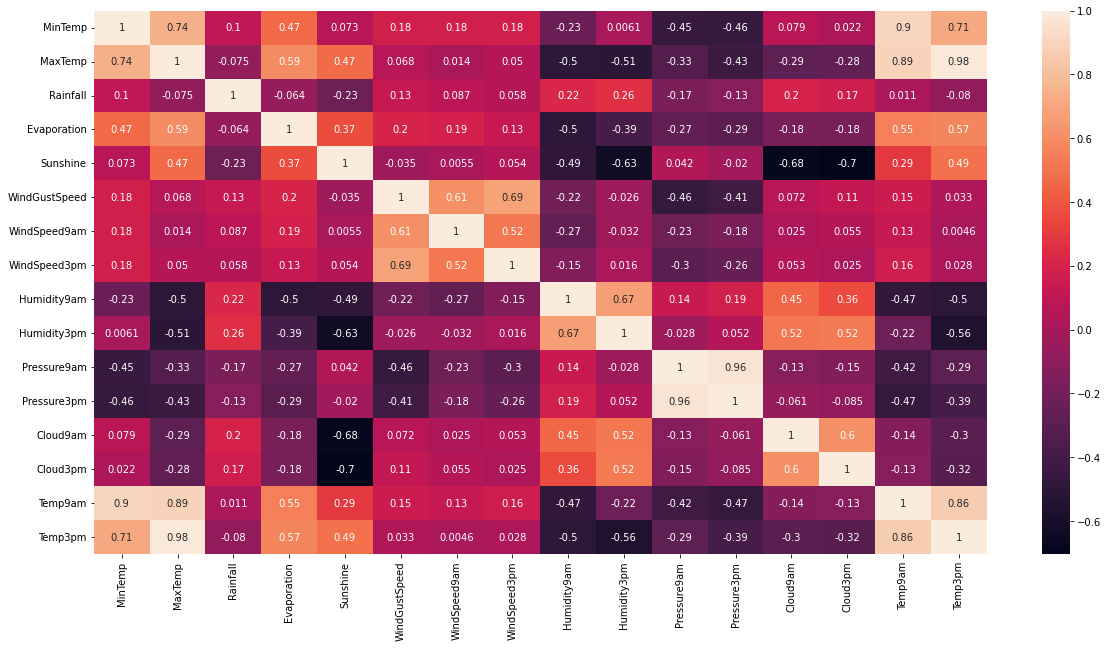

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Menunjukkan nilai korelasi tiap kolom dengan menggunakan heatmap

In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

# Logistic Regression & SVM

## Data Preprocessing

In [ ]:
X = df.drop(['RainTomorrow'], axis=1)
y = df[['RainTomorrow']]

pemisahan kolom 'RainTomorrow' sebagai target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
kat = [col for col in X_train.columns if X_train[col].dtypes == 'O']
num = [col for col in X_train.columns if X_train[col].dtypes != 'O']
print('Numeric Columns:', num)
print('categorical Columns:', kat)

Numeric Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
categorical Columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


proses pemisahan kolom numerik dengan kolom kategori

In [ ]:
for df in [X_train, X_test]:
    for col in num:
        col_median=X_train[col].median()
        df[col].fillna(col_median, inplace=True)

In [ ]:
for kat in [X_train, X_test]:
    kat['Location'].fillna(X_train['Location'].mode()[0], inplace=True)
    kat['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    kat['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    kat['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    kat['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

proses pengisian data numerik yang berisi NaN dengan nilai tengah tiap kolom dan data kategori dengan kategori dengan jumlah terbanyak

In [ ]:
y_train['RainTomorrow'].fillna(y_train['RainTomorrow'].mode()[0], inplace=True)
y_test['RainTomorrow'].fillna(y_train['RainTomorrow'].mode()[0], inplace=True)

In [ ]:
X_train_num = X_train[num]
X_train_cat = X_train[kat]

X_test_num = X_test[num]
X_test_cat = X_test[kat]

Proses pemisahan data numerik dengan kategori

In [ ]:
scaler = MinMaxScaler ()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled= scaler.transform(X_test_num)

In [ ]:
encoder =OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded=encoder.transform(X_test_cat)
X_train_cat_encoded

array([[23., 13.,  3.,  0.,  0.],
       [21., 14., 14., 13.,  0.],
       [45.,  1.,  3.,  4.,  1.],
       ...,
       [13., 14.,  7., 14.,  1.],
       [20.,  1.,  1.,  5.,  0.],
       [44., 13.,  7., 13.,  1.]])

proses encoding dan scaling data X train dan test

In [ ]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [ ]:
X_train_final_df=pd.DataFrame(X_train_final,columns=[num+kat])
X_train_final_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,0.341981,0.393195,0.000000,0.033103,0.586207,0.255814,0.149425,0.195402,0.70,0.59,...,0.6112,0.555556,0.555556,0.504219,0.401152,23.0,13.0,3.0,0.0,0.0
1,0.551887,0.470699,0.001617,0.037241,0.268966,0.441860,0.344828,0.379310,0.30,0.34,...,0.5264,0.888889,0.555556,0.485232,0.464491,21.0,14.0,14.0,13.0,0.0
2,0.577830,0.629490,0.012938,0.158621,0.744828,0.209302,0.000000,0.218391,0.86,0.53,...,0.5888,0.222222,0.444444,0.599156,0.633397,45.0,1.0,3.0,4.0,1.0
3,0.188679,0.362949,0.000539,0.033103,0.586207,0.286822,0.068966,0.080460,0.82,0.45,...,0.6128,0.555556,0.555556,0.246835,0.362764,17.0,8.0,7.0,11.0,0.0
4,0.580189,0.470699,0.003235,0.033103,0.586207,0.240310,0.068966,0.172414,0.67,0.68,...,0.5296,0.555556,0.555556,0.523207,0.485605,0.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,0.349057,0.315690,0.006469,0.033103,0.586207,0.426357,0.252874,0.321839,0.57,0.49,...,0.5136,0.555556,0.666667,0.348101,0.326296,35.0,14.0,7.0,14.0,1.0
116364,0.398585,0.362949,0.001617,0.040000,0.055172,0.193798,0.103448,0.172414,0.99,0.98,...,0.3248,0.555556,0.555556,0.407173,0.353167,12.0,6.0,7.0,3.0,0.0
116365,0.742925,0.686200,0.120216,0.052414,0.268966,0.643411,0.448276,0.448276,0.84,0.73,...,0.3488,0.888889,0.777778,0.719409,0.687140,13.0,14.0,7.0,14.0,1.0
116366,0.375000,0.570888,0.000000,0.022069,0.724138,0.170543,0.103448,0.172414,0.73,0.25,...,0.6912,0.111111,0.555556,0.453586,0.579655,20.0,1.0,1.0,5.0,0.0


## Model Definition

In [ ]:
logreg = LogisticRegression()


## Model Training & Evaluation

In [ ]:
logreg.fit(X_train_final, y_train)

C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train = logreg.predict(X_train_final)
y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8395177368348687

In [ ]:
y_pred_test = logreg.predict(X_test_final)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred_test)

0.8377904578578304

In [ ]:
X_train_sample = X_train_final_df.loc[0:20000]
y_train_sample = y_train[0:20000 + 1]
for kern in ['linear','poly','rbf','sigmoid']:
    t0=time.time()
    clf_svc = svm.SVC(kernel= kern)
    clf_svc.fit(X_train_sample, y_train_sample)
    y_pred = clf_svc.predict(X_train_sample)
    score = accuracy_score(y_train_sample,y_pred)
    print('%s, testing accuracy %f'%(kern,score))
    print('Time taken :' , time.time()-t0)

C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


linear, testing accuracy 0.846058
Time taken : 49.057780265808105


C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


poly, testing accuracy 0.794760
Time taken : 20.568981647491455


C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


rbf, testing accuracy 0.780661
Time taken : 35.36241126060486


C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


sigmoid, testing accuracy 0.666067
Time taken : 19.499842405319214


model training dan juga evaluation menggunakan metode logistic regression dan juga svm dengan menggunakan 20000 data random

## Model Inference

In [ ]:
data_sample = df_dummy.sample(2)
data_sample

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64807,2010-09-09,MelbourneAirport,10.0,16.1,0.0,5.4,5.8,N,72.0,N,...,77.0,61.0,1011.0,1006.2,6.0,5.0,11.5,15.8,No,Yes
137989,2014-05-31,AliceSprings,9.3,20.7,0.0,4.6,10.3,SSE,28.0,SSW,...,48.0,36.0,1021.2,1017.6,7.0,1.0,14.6,19.2,No,No


proses pengambilan data random untuk model inference

In [ ]:
data_sample.reset_index(drop=True,inplace=True)

reset index data sample

In [ ]:
kat_inf = [col for col in X_train.columns if data_sample[col].dtypes == 'O']
num_inf = [col for col in X_train.columns if data_sample[col].dtypes != 'O']

In [ ]:
data_inf_num = data_sample[num_inf]
data_inf_cat = data_sample[kat_inf]

In [ ]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

In [ ]:
data_inf_final= np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[ 0.43632075,  0.39508507,  0.        ,  0.03724138,  0.4       ,
         0.51162791,  0.59770115,  0.42528736,  0.77      ,  0.61      ,
         0.50496689,  0.4656    ,  0.66666667,  0.55555556,  0.39451477,
         0.40690979, 19.        ,  3.        ,  3.        ,  3.        ,
         0.        ],
       [ 0.41981132,  0.48204159,  0.        ,  0.03172414,  0.71034483,
         0.17054264,  0.17241379,  0.12643678,  0.48      ,  0.36      ,
         0.67384106,  0.648     ,  0.77777778,  0.11111111,  0.45991561,
         0.47216891,  3.        , 10.        , 11.        , 10.        ,
         0.        ]])

In [ ]:
y_pred_inf= logreg.predict(data_inf_final)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Rain-Prediction'])
y_pred_inf

,Rain-Prediction
0,Yes
1,No


In [ ]:
data_sample['Rain-Prediction']= y_pred_inf
data_sample

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Rain-Prediction
0,2010-09-09,MelbourneAirport,10.0,16.1,0.0,5.4,5.8,N,72.0,N,...,61.0,1011.0,1006.2,6.0,5.0,11.5,15.8,No,Yes,Yes
1,2014-05-31,AliceSprings,9.3,20.7,0.0,4.6,10.3,SSE,28.0,SSW,...,36.0,1021.2,1017.6,7.0,1.0,14.6,19.2,No,No,No


## Kesimpulan

Encoder yang digunakan adalah ordinalEncoder
Scaler yang digunakan adalah MinMaxScaler

*Logistic Regression*

1. Akurasi prediksi train yang didapat sebesar : 83.95 % 
2. Akurasi prediksi test yang didapat sebesar : 83.78 % 

tidak ada indikasi overfit maupun underfit karena selisih akurasi prediksi dari data train dan test tidak terlalu besar

*SVM*

Hyperparameter yang dituning adalah kernel digunakan 20000 data dimana:

1. linear memiliki akurasi sebesar 84.6 % 
2. polynomial memiliki akurasi sebesar 79.47 % 
3. rbf memiliki akurasi sebesar 78.06 % 
4. sigmoid memiliki akurasi sebesar 66.61 %

Dapat diambil kesimpulan kernel dengan akurasi terbesar adalah linear
